# Análisis de Textos

Para analizar los textos es importante identificar dos piezas:

* `Corpus` - Es el conjunto de textos a analizar
* `Vocabulary` - Es el conjunto de palabras a inspeccionar

Podemos procesar textos mediante diversas técnicas, pero una de las más comunes consiste en **vectorizar** el texto. Es decir, transformar un texto a un vector de números, esos números representarán los índices o categorías de cada palabra según el vocabulario.

Ejemplo, tenemos el siguiente corpus:

    Hola, estoy realizando el proyecto,
    pero surgió una vulnerabilidad sobre
    el desarrollo, por lo que se le notificó
    al líder, para que revise el proyecto,
    y poder acabar el proyecto, para poder
    así finalizar el proyecto.

Del corpus podemos extraer el vocabulario

    0 - hola
    1 - estoy
    2 - realizando
    3 - el
    4 - proyecto
    5 - pero
    6 - surgió
    7 - una
    ...
    50 - finalizar

De esta manera el corpus o cualquier texto se puede transformar a un vector de índices sobre el vocabulario.

    [0, 1, 2, 3, 5, 6, 7, 8, 3, 9, 10
     11, 12, 13, 14, 15, 16, 17, 18, 13,
     ..., 50, 3, 4]

Entonces el texto se ve como un vector y podríamos a partir de aquí hacer análisis, como los siguientes:

1. La frecuencia de cada índice en el vector
2. La probabilidad que una palabra esté frente a otra
3. Los grupos de palabras cercanos a un índice

Así tomando el corpus que le enseña y arma el vocabulario, podemos también tomar otro texto y formar otro vector.

    Hola, acabo de hablar con el líder del proyecto
    y dijo que no había problema con la vulnerabilidad.

Formando un segundo vector:

    [0, 51, 17, 52, 34, 3, 25, ...]

Con esto podríamos conseguir comparar textos, a partir de comparar sus vectores.

Y también podríamos entrenar una red neuronal, un árbol de decisión o un k-medias, para que aprendan que ese texto por ejemplo es positivo o negativo, que aprendan que ese texto implica mayor o menor eficiencia en el proyecto, o que implican que el líder va a renunciar o ser despedido.

In [11]:
import pandas as pd

proyectos = pd.read_excel("data/ProyectosFinalizados.xlsx", sheet_name="base")

def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


In [72]:
proyectos.columns[120:]

Index(['OBSERVACIONES', 'ANOTACIONES', 'COMENTATIO_PRODUCTIVIDAD',
       'FECHA_FESTIVO', 'NOMBRE_FESTIVO', 'PDR_LIMPIO', 'PDR_XXS', 'PDR_XS',
       'PDR_S', 'PDR_M_1', 'PDR_M_2', 'PDR_L', 'LEAD_TIME',
       'F1_GESTIONDELA_DEMANDA', 'F2_ELICITACION', 'F3_CONTRUCCION',
       'F4_FINAL', 'TAMANO'],
      dtype='object')

In [12]:
proyectos["OBSERVACIONES"].sample(10)

197                                                   NaN
171                                                   NaN
1312    Se tomó semana y media aproximadamente en la e...
914                                                   NaN
2676    Líder ya no labora en coppel desde marzo 2022,...
997                                                   NaN
1737    Poner tiempos planeados ya que se cerraron en ...
2588                                                  NaN
884                                                   NaN
317                                                   NaN
Name: OBSERVACIONES, dtype: object

In [13]:
dataset = proyectos[["ID_PROYECTO", "OBSERVACIONES"]].copy()

dataset = dataset.dropna()

corpus = dataset["OBSERVACIONES"].values

corpus

array(['Original y 4 complementarias', 'Original y 2 complementarias',
       'Original y 2 complementarias', ...,
       'Sin cronograma ni hoja de actividades, registrado como metodologia ágil. Centro pertenece a Mayte y no entra en indicadores. ',
       'Normativo, lider comenta que los tiempos capturados tanto en la hoja de actividades como en cronogrma no son reales. Tambien nos comenta que se inicio con desarrollo antes de que fuera asignado en la herramienta. Tuvieron muchas complicaciones ya que el APS dejo de funcionar. No tomar en cuenta para modelos de Esfuerzo ni Duración.',
       'Cascada, lider nos comenta el unico inconveniente que se tuvo fue cuando el ADM fallo a partir del 24 de noviembre. Tambien nos comenta que no instalaaron en producción por que no fue requerido. No tuvieron inconvenientes relevantes que pudieran haber afactado el esfuerzo del proyecto. No cuenta con el dato excato de vulnerabilidades ya que se iban resolviendo sobre el desarrollo en cuanto se d

In [14]:
dataset.head()

,ID_PROYECTO,OBSERVACIONES
2,3,Original y 4 complementarias
7,8,Original y 2 complementarias
9,10,Original y 2 complementarias
11,12,Incluye RNFs
12,13,Incluye RNFs


In [15]:
corpus[1112]

'Líder renunció, tiempos no confiables'

In [16]:
dataset.iloc[1112]["ID_PROYECTO"]

2318

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

vectorizer.fit(corpus)

vocabulary = dict(vectorizer.vocabulary_)

vocabulary

{'original': 2223,
 'complementarias': 764,
 'incluye': 1699,
 'rnfs': 2747,
 'se': 2790,
 'deja': 1035,
 'pesar': 2313,
 'de': 996,
 'que': 2529,
 'los': 1907,
 'tiempos': 2991,
 'codificación': 718,
 'sean': 2793,
 'muy': 2111,
 'pequeños': 2294,
 'complementaria': 763,
 'medición': 1976,
 'correcta': 890,
 'puede': 2517,
 'servir': 2828,
 'para': 2248,
 'pruebas': 2505,
 'elicitación': 1261,
 'agregan': 326,
 'reales': 2571,
 'arq': 482,
 'cod': 715,
 'pru': 2501,
 'ya': 3186,
 'estaban': 1375,
 'en': 1287,
 'pusieron': 2526,
 'demás': 1058,
 'rubros': 2757,
 'tienen': 2995,
 'lo': 1900,
 'real': 2570,
 'incluyen': 1700,
 'maneja': 1928,
 'muchos': 2103,
 'rnf': 2746,
 'la': 1833,
 'mayoria': 1960,
 'las': 1845,
 'fases': 1485,
 'comporta': 775,
 'normal': 2156,
 'modificar': 2073,
 'leyenda': 1857,
 'versión': 3148,
 'cambia': 609,
 'el': 1247,
 'conteo': 864,
 'realizado': 2575,
 'por': 2386,
 'spingere': 2892,
 'documento': 1212,
 'tiene': 2994,
 'otro': 2237,
 'total': 3022,
 'c

In [18]:
# vocabulary["hola"] # ERROR: La palabra no está en el vocabulario

In [19]:
vocabulary["líder"]

1914

In [20]:
vocabulary["renunció"]

2656

In [21]:
vocabulary["proyecto"]

2496

In [22]:
vocabulary["programador"]

2471

In [23]:
vectorizer.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
import numpy as np

matrix_count = np.array(vectorizer.fit_transform(corpus).toarray())

from operator import itemgetter

list(map(lambda t: ([key for key, index in vocabulary.items() if index == t[0]][0], t[1]), sorted(list(enumerate(np.sum(matrix_count, axis=0))), key=itemgetter(1), reverse=True)))

[('se', 2548),
 ('de', 2186),
 ('en', 1213),
 ('el', 1192),
 ('que', 1117),
 ('no', 1040),
 ('la', 830),
 ('proyecto', 643),
 ('por', 454),
 ('del', 438),
 ('lo', 436),
 ('con', 429),
 ('para', 389),
 ('actividades', 379),
 ('los', 338),
 ('tiempos', 313),
 ('las', 293),
 ('tiempo', 266),
 ('ya', 258),
 ('al', 242),
 ('líder', 237),
 ('comenta', 236),
 ('esfuerzo', 223),
 ('desarrollo', 218),
 ('un', 217),
 ('antes', 212),
 ('pruebas', 212),
 ('más', 202),
 ('vulnerabilidades', 196),
 ('fue', 175),
 ('lider', 175),
 ('normativo', 175),
 ('folio', 167),
 ('es', 162),
 ('hrs', 148),
 ('proyectos', 148),
 ('equipo', 145),
 ('administración', 144),
 ('fase', 138),
 ('solo', 130),
 ('cronograma', 125),
 ('proveedor', 125),
 ('proceso', 124),
 ('funcionalidad', 123),
 ('planeado', 121),
 ('sin', 121),
 ('pero', 118),
 ('scrum', 118),
 ('debido', 115),
 ('fases', 115),
 ('una', 115),
 ('horas', 112),
 ('seguimiento', 110),
 ('como', 107),
 ('cuenta', 101),
 ('otras', 101),
 ('ser', 96),
 ('hu

['proyecto']

In [24]:
sorted(list(filter(lambda key: key[0] == 'v', vocabulary.keys())), reverse=True)

['víctor',
 'vía',
 'válidos',
 'válido',
 'vulnerbilidades',
 'vulneravilidades',
 'vulnerable',
 'vulnerabillidades',
 'vulnerabilidadeslas',
 'vulnerabilidadesde',
 'vulnerabilidades',
 'vulnerabilidad',
 'vuelve',
 'vuejs',
 'vue',
 'vs',
 'volvió',
 'volvio',
 'volver',
 'vivio',
 'visualbasic',
 'visual',
 'visto',
 'violeta',
 'vio',
 'vigencia',
 'vieron',
 'viene',
 'viejos',
 'viejo',
 'vieja',
 'vida',
 'vez',
 'versión',
 'versionó',
 'versiono',
 'versiones',
 'versionaste',
 'versionarse',
 'versionar',
 'versionamiento',
 'versionado',
 'version',
 'verificarlos',
 'verificarlo',
 'verificar',
 'verificado',
 'verificadas',
 'verificación',
 'ver',
 'venta',
 'venian',
 'venia',
 'ven',
 'vega',
 'veces',
 'vea',
 'vdi',
 'varios',
 'varias',
 'variadas',
 'variables',
 'variable',
 'van',
 'valle',
 'validó',
 'valido',
 'validar',
 'validado',
 'validación',
 'validaciones',
 'validacion',
 'valida',
 'vale',
 'vacía',
 'vacaciones',
 'va',
 'v7',
 'v3',
 'v2',
 'v1']

In [25]:
vectorizer2 = CountVectorizer(vocabulary=["líder", "vulnerbilidades", "vulneravilidades", "vulnerable", "vulnerabillidades", "vulnerabilidadeslas", "vulnerabilidadesde", "vulnerabilidades", "vulnerabilidad"])

vectorizer2.fit_transform(corpus).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [26]:
corpus[1448]

'Cascada, Lider comenta que tuvo contratiempos con el cliente ya que no lo podian localizar. Se detectaron 9 vulnerabilidades las cuales fueron resueltas por 1 programador.  Se autorizo instalación por  medio de correo. Preguntar por esfuerzo de vulnerabilidad.'

In [27]:
import numpy as np

matrix_count = np.array(vectorizer2.fit_transform(corpus).toarray())

np.sum(matrix_count, axis=0)

array([237,   2,   1,   1,   2,   2,   1, 196,  14], dtype=int64)

In [28]:
matrix_count[:,8]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
dataset["PALABRA_LIDER"] = matrix_count[:,0]
dataset["PALABRA_VULNERABILIDAD"] = sum([matrix_count[:,j] for j in range(1, 8)])

dataset.sample(5)

,ID_PROYECTO,OBSERVACIONES,PALABRA_LIDER,PALABRA_VULNERABILIDAD
1976,1977,"El proyecto si se desarrollo en java, es un de...",0,0
651,652,Se informó por parte del líder que es un proye...,1,0
1722,1723,"Se agregan 120 hrs de seguimiento, líder comen...",1,0
2892,2893,Lider comenta que alrededor de 93 vulnerabilid...,0,1
1916,1917,"Lider se encuentra en entrenamiento gerencial,...",0,0


In [30]:
proyectos[(proyectos["ID_PROYECTO"] == 2713)]["OBSERVACIONES"].values[0]

'Se inició con líder Sergio Tiznado, en embargo, la mayoría del proyecto lo realizó Yagger, con los dos se realizó la validación. Problemas para instalar. Se detectaron vulnerabilidades de BD y se les complicó liberar. Se detonaron varios planes de accion para la liberación hasta que se instaló. Líder comenta que solo se trabajó a nivel BD'

In [31]:
cluster_lider_vulnerabilidad = dataset[ (dataset["PALABRA_LIDER"] > 0) & (dataset["PALABRA_VULNERABILIDAD"] > 0) ]

cluster_lider_vulnerabilidad

,ID_PROYECTO,OBSERVACIONES,PALABRA_LIDER,PALABRA_VULNERABILIDAD
2708,2709,"Líder comenta que fue un cambio muy pequeño, s...",1,1
2710,2711,Líder nuevo en el proceso de vulnerabilidades....,1,2
2712,2713,"Se inició con líder Sergio Tiznado, en embargo...",2,1
2716,2717,"proyecto Normativo, se estimó para 1 año, sin ...",1,1
2725,2726,se quitan actividades de atender vulnerabilid...,1,2
2780,2781,Se detectaron vulnerabilidades que no se resol...,1,1
2781,2782,Proyecto se tuvo que entregar antes de lo prev...,1,1
2782,2783,Proyecto Normativo. Se eliminan 200hrs al desa...,1,2
2783,2784,"No siguió proceso, se entregó como si fueran s...",1,1
2790,2791,Líder actual cerró los folios del líder anteri...,2,1


In [32]:
cluster_lider_vulnerabilidad = pd.merge(cluster_lider_vulnerabilidad[ ["ID_PROYECTO"] ], proyectos, on="ID_PROYECTO", how="left")

cluster_lider_vulnerabilidad

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,2709,Argentina,1037.1,1037,1037Argentina,SUPLENCIA DE HUELLA (COMPLEMENTO PETICIÓN 814.1),47,0.513274,24.424468,1240.0,...,24.424468,NaN,NaN,NaN,582.0,229.0,9.0,282.0,1.0,30-99
1,2711,Argentina,1047.1,1047,1047Argentina,Asignar Megapuntos Coppel a Clientes que abona...,38,0.514528,27.613421,1225.5,...,27.613421,NaN,NaN,NaN,504.0,276.0,31.0,196.0,0.0,30-99
2,2713,Argentina,1066.1,1066,1066Argentina,MCR Argentina (Procesos bloque 4),52,0.592593,13.726346,753.5,...,13.726346,NaN,NaN,NaN,465.0,112.0,73.0,276.0,1.0,30-99
3,2717,Afore,2088.1,2088,2088Afore,Anexos Circular 19 CONSAR Actualización Anexo ...,8,0.568193,127.523750,993.5,...,NaN,NaN,NaN,NaN,276.0,182.0,11.0,56.0,26.0,2-9
4,2726,México,29502.1,29502,29502México,Complementaria 19589 y 19239: Estado de Cuenta...,6,0.226377,136.788333,1042.0,...,NaN,NaN,NaN,NaN,413.0,112.0,46.0,129.0,123.0,2-9
5,2781,Afore,2041.0,2041,2041Afore,Automatizacion y actualizacion Edocta 2021,6,0.102041,NaN,2801.0,...,NaN,NaN,NaN,NaN,447.0,90.0,78.0,337.0,0.0,2-9
6,2782,Afore,2302.0,2302,2302Afore,Cadena de Derechos (N)- Retiro de Supervivienc...,13,0.634146,NaN,3278.5,...,NaN,NaN,NaN,NaN,165.0,107.0,15.0,42.0,0.0,10-29
7,2783,Afore,2222.0,2222,2222Afore,CANCELACIÓN DE TRASPASOS A-A,36,0.333333,72.527778,2811.0,...,72.527778,NaN,NaN,NaN,259.0,25.0,10.0,221.0,0.0,30-99
8,2784,Afore,2277.0,2277,2277Afore,Conexión Universidad Capacitación,5,0.916667,70.902000,455.5,...,NaN,NaN,NaN,NaN,181.0,27.0,9.0,130.0,14.0,2-9
9,2791,Argentina,843.0,843,843Argentina,Migracion Servidores SQL Carteras Argentina - ...,45,0.275281,NaN,2713.0,...,NaN,NaN,NaN,NaN,1178.0,891.0,153.0,238.0,0.0,30-99


<Axes: >

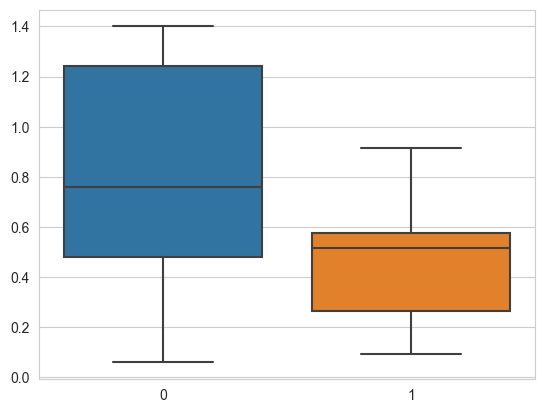

In [33]:
import seaborn as sns

sns.boxplot([proyectos["EFICIENCIA"], cluster_lider_vulnerabilidad["EFICIENCIA"]])

In [34]:
import numpy as np

In [43]:
print("Los proyectos en general tienen una eficiencia:")

ef_min = np.quantile(proyectos["EFICIENCIA"].dropna(), 0)
ef_25 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.25)
ef_50 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.5)
ef_75 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.75)
ef_max = np.quantile(proyectos["EFICIENCIA"].dropna(), 1)

print("MÍN: {:.2f}".format(ef_min))
print("25%: {:.2f}".format(ef_25))
print("50%: {:.2f}".format(ef_50))
print("75%: {:.2f}".format(ef_75))
print("MÁX: {:.2f}".format(ef_max))

Los proyectos en general tienen una eficiencia:
MÍN: 0.06
25%: 0.48
50%: 0.76
75%: 1.24
MÁX: 1.40


In [44]:
print("Los proyectos dónde en las observaciones se menciona la palabra líder y las palabras relacionadas a vulnerabilidad tienen una eficiencia:")

ef_min = np.quantile(cluster_lider_vulnerabilidad["EFICIENCIA"], 0)
ef_25 = np.quantile(cluster_lider_vulnerabilidad["EFICIENCIA"], 0.25)
ef_50 = np.quantile(cluster_lider_vulnerabilidad["EFICIENCIA"], 0.5)
ef_75 = np.quantile(cluster_lider_vulnerabilidad["EFICIENCIA"], 0.75)
ef_max = np.quantile(cluster_lider_vulnerabilidad["EFICIENCIA"], 1)

print("MÍN: {:.2f}".format(ef_min))
print("25%: {:.2f}".format(ef_25))
print("50%: {:.2f}".format(ef_50))
print("75%: {:.2f}".format(ef_75))
print("MÁX: {:.2f}".format(ef_max))

Los proyectos dónde en las observaciones se menciona la palabra líder y las palabras relacionadas a vulnerabilidadtienen una eficiencia:
MÍN: 0.09
25%: 0.26
50%: 0.51
75%: 0.57
MÁX: 0.92


Podemos observar que los proyectos en general con peor eficiencia (quantil 25%) alcanzan 0.48 puntos de eficiencia, en promedio

In [46]:
cluster_c_sharp = proyectos[ (proyectos["LENGUAJE_I"] == "C#") ]

cluster_c_sharp.sample(5)

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
1688,1689,México,24173.2,24173,24173México,Sistema analítico de Recuperación de Crédito V...,72,NaN,44.096806,2918.0,...,44.096806,NaN,NaN,NaN,525.0,206.0,172.0,168.0,70.0,30-99
920,921,México,14963.2,14963,14963México,CONFIRMACIÓN DE GUÍAS DE ROPA EN BITÁCORAS,80,0.527688,44.741250,3857.0,...,44.741250,NaN,NaN,NaN,733.0,397.0,213.0,251.0,1.0,30-99
1588,1589,Argentina,867.1,867,867Argentina,DÍAS NO LABORABLES,6,0.809566,62.591667,417.0,...,NaN,NaN,NaN,NaN,503.0,455.0,10.0,25.0,10.0,2-9
1529,1530,México,27506.1,27506,27506México,MODIFICACIONES AL PROCESO CIFRAS DE CONTROL PA...,10,1.316177,26.098000,345.0,...,NaN,NaN,NaN,NaN,31.0,10.0,7.0,13.0,0.0,10-29
942,943,México,19229.1,19229,19229México,Liquidaciones con causa 15,40,1.240000,14.459500,563.5,...,14.459500,NaN,NaN,NaN,184.0,135.0,13.0,30.0,0.0,30-99


In [48]:
print("Los proyectos en los que el lenguaje fue C# tuvieron una eficiencia:")

ef_min = np.quantile(cluster_c_sharp["EFICIENCIA"].dropna(), 0)
ef_25 = np.quantile(cluster_c_sharp["EFICIENCIA"].dropna(), 0.25)
ef_50 = np.quantile(cluster_c_sharp["EFICIENCIA"].dropna(), 0.5)
ef_75 = np.quantile(cluster_c_sharp["EFICIENCIA"].dropna(), 0.75)
ef_max = np.quantile(cluster_c_sharp["EFICIENCIA"].dropna(), 1)

print("MÍN: {:.2f}".format(ef_min))
print("25%: {:.2f}".format(ef_25))
print("50%: {:.2f}".format(ef_50))
print("75%: {:.2f}".format(ef_75))
print("MÁX: {:.2f}".format(ef_max))

Los proyectos en los que el lenguaje fue C# tuvieron una eficiencia:
MÍN: 0.08
25%: 0.45
50%: 0.81
75%: 1.33
MÁX: 1.40


<Axes: >

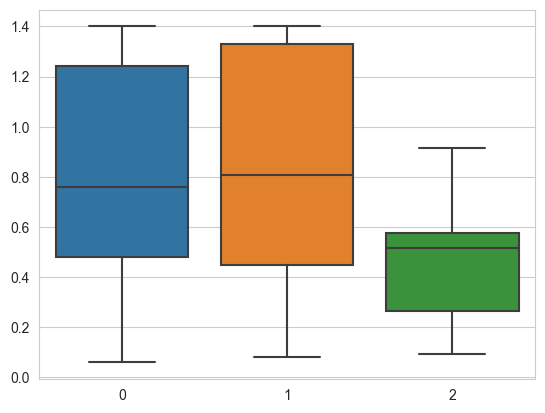

In [49]:
sns.boxplot([
    proyectos["EFICIENCIA"],
    cluster_c_sharp["EFICIENCIA"],
    cluster_lider_vulnerabilidad["EFICIENCIA"]
])

## EJERCICIO

Sigue los pasos para hacer un análisis de menciones en clusterización por textos.

### 1. Determinar el vocabulario de menciones

El vocabulario serán palabras contenidas dentro de los textos en minúsculas, y si se hace limpieza de textos se debe considerar.

```python
menciones = [ "líder", "esfuerzo" ]
```

### 2. Construir un vectorizador para extraer la matriz de conteos

```python
import pandas as pd

# TODO: Cargar los proyectos del excel

dataset = proyectos[ ["ID_PROYECTO", "OBSERVACIONES"] ].dropna()

corpus = dataset["OBSERVACIONES"].values

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=menciones)

import numpy as np

matrix_menciones = np.array(vectorizer.fit_transform(corpus).toarray())

dataset["LIDER_MENCIONADO"] = matrix_menciones[:, 0]
dataset["ESFUERZO_MENCIONADO"] = matrix_menciones[:, 1]

segmento = dataset[ ["ID_PROYECTO"] ][ (dataset["LIDER_MENCIONADO"] > 0) & (dataset["ESFUERZO_MENCIONADO"] > 0) ]

cluster_menciona_lider_esfuerzo = pd.merge(segmento, proyectos, on="ID_PROYECTO", how="left")
```

## 3. Comparar la eficiencia en general en todos los proyectos, y la eficiencia en el clúster

```python
import seaborn as sns

sns.boxplot([
    proyectos["EFICIENCIA"],
    cluster_menciona_lider_esfuerzo["EFICIENCIA"],
])

print("Los proyectos en general tienen una eficiencia:")

ef_min = np.quantile(proyectos["EFICIENCIA"].dropna(), 0)
ef_25 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.25)
ef_50 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.5)
ef_75 = np.quantile(proyectos["EFICIENCIA"].dropna(), 0.75)
ef_max = np.quantile(proyectos["EFICIENCIA"].dropna(), 1)

print("MÍN: {:.2f}".format(ef_min))
print("25%: {:.2f}".format(ef_25))
print("50%: {:.2f}".format(ef_50))
print("75%: {:.2f}".format(ef_75))
print("MÁX: {:.2f}".format(ef_max))

print("Los proyectos dónde en las observaciones se menciona la palabra líder y la esfuerzo tiene una eficiencia:")

ef_min = np.quantile(cluster_menciona_lider_esfuerzo["EFICIENCIA"].dropna(), 0)
ef_25 = np.quantile(cluster_menciona_lider_esfuerzo["EFICIENCIA"].dropna(), 0.25)
ef_50 = np.quantile(cluster_menciona_lider_esfuerzo["EFICIENCIA"].dropna(), 0.5)
ef_75 = np.quantile(cluster_menciona_lider_esfuerzo["EFICIENCIA"].dropna(), 0.75)
ef_max = np.quantile(cluster_menciona_lider_esfuerzo["EFICIENCIA"].dropna(), 1)

print("MÍN: {:.2f}".format(ef_min))
print("25%: {:.2f}".format(ef_25))
print("50%: {:.2f}".format(ef_50))
print("75%: {:.2f}".format(ef_75))
print("MÁX: {:.2f}".format(ef_max))
```